### Neural Network 적합

In [1]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]

In [2]:
from sklearn.neural_network import MLPClassifier

In [4]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [5]:
clf.predict([[2., 2.], [-1., -2.]])

array([[1, 1],
       [0, 1]])

In [6]:
clf.coefs_ # hidden layer의 weight

[array([[-0.15011367, -0.62860541, -0.90433213, -3.45938109, -0.63904618],
        [-0.73749132, -1.5947694 , -0.2793927 , -3.28854097,  0.0702225 ]]),
 array([[ 0.30838904, -0.14960207],
        [ 3.14928608, -0.65056811],
        [-0.54615798,  0.54407041],
        [ 4.36386369, -0.33753023],
        [ 0.34792663,  0.68091737]]),
 array([[-3.58233912,  2.68515229],
        [ 0.9049651 , -0.96123048]])]

In [7]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 2)]

### model의 복잡도에 따른 퍼포먼스 비교

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [13]:
# 설정할 parameter들을 입력. h는 시각화를 얼마나 자세하게 할 것인가에 대한 임의의 값
h = .02
alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

In [14]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [15]:
names

['alpha 1e-05', 'alpha 0.001', 'alpha 0.1', 'alpha 10.0', 'alpha 1000.0']

In [91]:
classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1, hidden_layer_sizes=[100, 100], max_iter=2000))
    # max_iter 조정

In [92]:
classifiers

[MLPClassifier(alpha=1e-05, hidden_layer_sizes=[100, 100], max_iter=2000,
               random_state=1, solver='lbfgs'),
 MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100], max_iter=2000,
               random_state=1, solver='lbfgs'),
 MLPClassifier(alpha=0.1, hidden_layer_sizes=[100, 100], max_iter=2000,
               random_state=1, solver='lbfgs'),
 MLPClassifier(alpha=10.0, hidden_layer_sizes=[100, 100], max_iter=2000,
               random_state=1, solver='lbfgs'),
 MLPClassifier(alpha=1000.0, hidden_layer_sizes=[100, 100], max_iter=2000,
               random_state=1, solver='lbfgs')]

In [93]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)

In [66]:
pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [67]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [94]:
# 에러 생성
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linear_separable = (X, y)

In [69]:
linear_separable

(array([[ 0.26657401,  1.34856054],
        [ 2.45422481,  0.82376731],
        [ 2.62111035,  1.7605275 ],
        [ 1.84591192,  2.04618256],
        [ 1.32097884,  1.70181469],
        [ 3.97616763, -1.07822436],
        [ 2.70215442, -0.4600292 ],
        [ 2.40471028,  2.59745805],
        [ 2.97981765, -0.51666779],
        [ 2.62307329,  1.26492508],
        [ 0.93817538,  1.21018976],
        [-0.42304024,  0.04216385],
        [ 0.6277561 ,  2.20404133],
        [ 0.02926242,  1.08553126],
        [ 1.96878825, -1.08308565],
        [-0.75383879,  0.52390554],
        [ 1.63198686,  2.07061346],
        [ 2.18329097, -0.00614472],
        [ 3.0372504 ,  2.38575638],
        [-0.1407164 ,  2.25997053],
        [ 1.727912  ,  0.91004531],
        [ 2.97275204,  1.85001866],
        [ 1.55863334,  1.66522927],
        [ 2.14129893,  2.28276851],
        [ 2.25482302,  2.82825674],
        [ 0.62401835,  1.1031466 ],
        [ 0.7098867 ,  2.52953583],
        [-0.3257527 ,  0.101

In [95]:
# 여러 모양의 추가 데이터셋 생성
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linear_separable]

plt.rcParams['figure.figsize'] = [18, 9]
i = 1

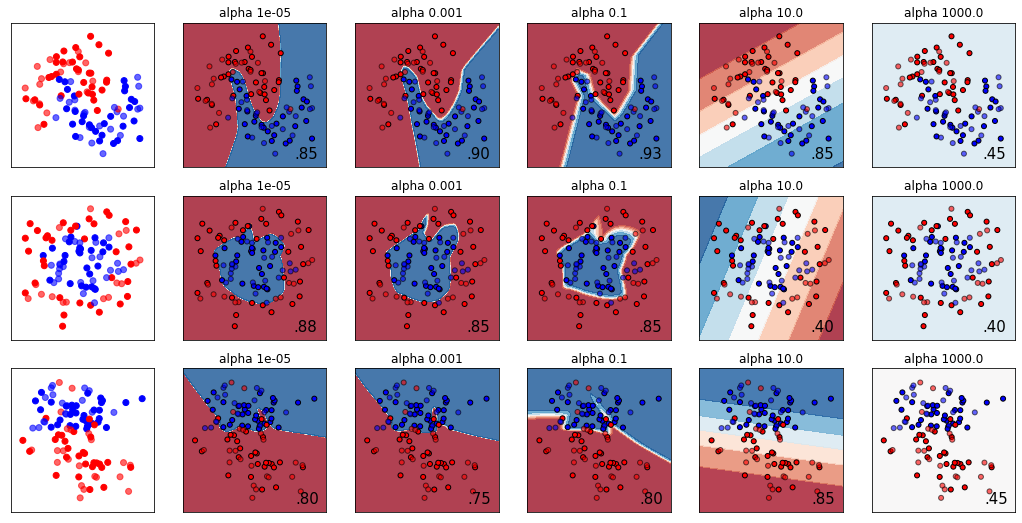

In [96]:
for X, y in datasets:
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers)+1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha = 0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = 'black', s = 25)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha=0.6, edgecolors = 'black', s = 25) 
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, (f'{score:.2f}').lstrip('0'), size = 15, horizontalalignment = 'right')
        
        i += 1
        
figure.subplots_adjust(left = .02, right = .98)
plt.show()